# Dataset (_Artificial_)

Artificial data modelling rebound X-ray signal and Rock density.

Available data $\rightarrow$
Experiment generated data variety of rock samples and how x-ray signals rebound from them.

>**Goal**: Predict **`Rock density`** based on **rebound `X-ray signal`** in order to decide **cutting tool** to use for boring a tunnel.

### Features $\rightarrow$
1. **`X-ray signal strength`** (nHz/Nano Hetrz)
Target variable $\rightarrow$
2. **`Rock density`** (kg/m<sup>3</sup>)

Will create a **model** that can explain the dataset and **generalize** for future real-world use.

# Loading & Probing the data

In [1]:
# for data manipulation & visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load into dataframe

filepath = r"D:\ML\Machine Learning_Practical\Scikit Learn\Decision Trees\Data\rock_density_xray.csv"
df = pd.read_csv(filepath)

In [3]:
df.head()

Rebound Signal Strength nHz  Rock Density kg/m3
0                    72.945124            2.456548
1                    14.229877            2.601719
2                    36.597334            1.967004
3                     9.578899            2.300439
4                    21.765897            2.452374

In [4]:
# rename columns for easier access
df = df.rename(columns={"Rebound Signal Strength nHz":"signal",
                  "Rock Density kg/m3":"density"})

In [5]:
# after renaming cols
df.head()

signal   density
0  72.945124  2.456548
1  14.229877  2.601719
2  36.597334  1.967004
3   9.578899  2.300439
4  21.765897  2.452374

## Visualizing the data

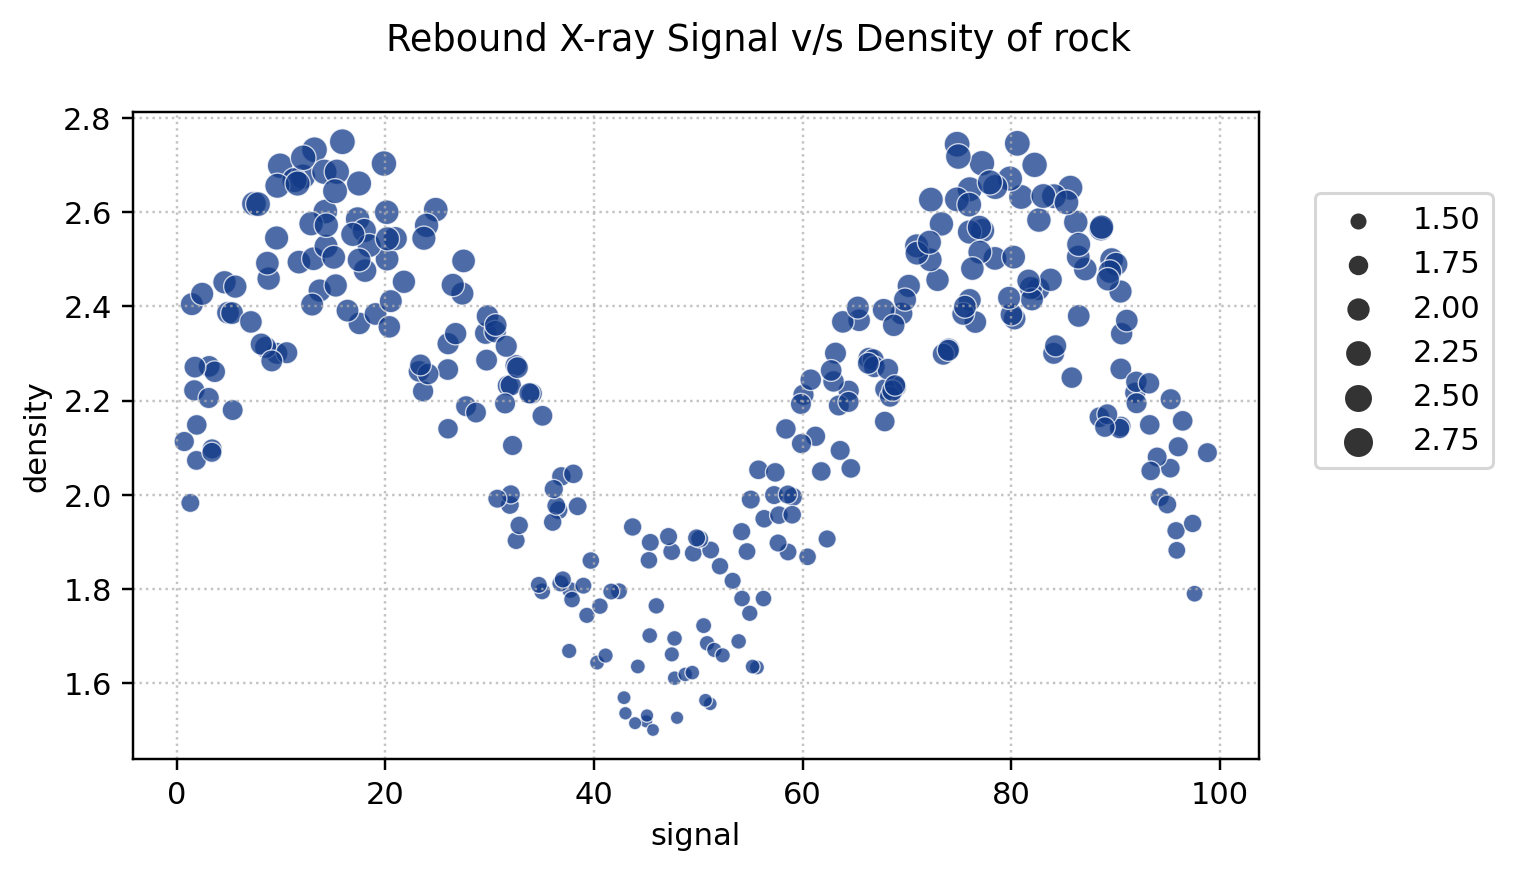

In [6]:
# scatterplot

fig, ax = plt.subplots(figsize=(7,4), dpi=220)

sns.scatterplot(x="signal", y="density", data=df, ax=ax,
               s=15, size="density", color="#113988", alpha=0.75)

ax.grid(linestyle=":", linewidth=0.8, alpha=0.75)
ax.legend(loc=(1.05, 0.45))

fig.suptitle("Rebound X-ray Signal v/s Density of rock")
fig.tight_layout();

# Plan of Action
Will try out **different ML models**  and **evaluate** performance of each.\
Will conclude which model best explains the data and is likely to generalize well.

##### NOTE:
>_Some datasets like this one may require complex model to explain.\
As the **sinusoidal pattern** underlying the data reveals, models such as `linear regression` or `polynomial regression` may be too simple for modelling such a dataset.\
Will need something more complex such as a `Random Forest decision tree`._

# Preparing the data for training & testing
>_Since only **single feature** dataset, hence **feature scaling** will **not** be required in this case. The scale of data of target variable & input features do not vary over large magnitudes_.

##### NOTE
_`scikit-learn` expects inputs to be **2D Numpy arrays**.\
Hence need to **reshape** data as $\rightarrow$_

```python
array.reshape(-1, 1) -> for single feature
array.reshape(1, -1) -> for single example
array.reshape(m,n) -> for m examples & n features
```

In [7]:
# separating the feature

# comvert input featur into 2D numpy array of shape (m,1)
# i.e m Rows & 1 Col (Column vector) 
X = np.array(df["signal"]).reshape(-1,1)

# convert target label into 2D numy array of shape (m,1)
# i.e. m Rows & 1 Col (Column vector)
y = np.array(df["density"]).reshape(-1,1)

In [8]:
print(f"First 5 examples (feature):\n{X[0:5]}")
print(f"\n\nFirst 5 examples (target):\n{y[0:5]}")

First 5 examples (feature):
[[72.94512436]
 [14.2298772 ]
 [36.59733361]
 [ 9.57889939]
 [21.76589708]]


First 5 examples (target):
[[2.45654788]
 [2.60171932]
 [1.96700389]
 [2.30043858]
 [2.45237439]]


In [9]:
# for creating training set & test set

from sklearn.model_selection import train_test_split

In [10]:
# Training set = 90% data; Test set = 10% data

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=0)

# Model 1: Linear Regression model

In [11]:
# linear regression model

from sklearn.linear_model import LinearRegression

In [12]:
# instantiate model
lr_model = LinearRegression()

In [13]:
# train the model
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

In [14]:
# get predictions on test set
lr_predictions = lr_model.predict(X=X_test)

In [15]:
print(f"First 5 predictions off Test set:\n{lr_predictions[0:5]}")
print(f"\n\nFirst 5 actual target values in Test set:\n{y_test[0:5]}")

First 5 predictions off Test set:
[[2.24108167]
 [2.20385041]
 [2.23353518]
 [2.20974572]
 [2.23066268]]


First 5 actual target values in Test set:
[[2.54371962]
 [2.70434078]
 [2.23167113]
 [2.26671265]
 [2.01188113]]


In [16]:
# evaluate performance

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
# get error scores

# mean squared error
mse = mean_squared_error(y_true=y_test, y_pred=lr_predictions)
# mean absolute error
mae = mean_absolute_error(y_true=y_test, y_pred=lr_predictions)
# root mean squared error
rmse = np.sqrt(mse)

In [18]:
print(f"Actual value of target label ('density') varies between:\n{y.min()} and {y.max()} with Mean of {y.mean()}\n")

print(f"Mean Absolute Error = {round(mae, ndigits=4)}")
print(f"Root Mean Squared Error = {round(rmse, ndigits=4)}")

Actual value of target label ('density') varies between:
1.5 and 2.75 with Mean of 2.225062949323796

Mean Absolute Error = 0.2089
Root Mean Squared Error = 0.2666


#### Observation
1. **`density`** ranges b/w `0.5 & 2.75`, and both **`MAE & RMSE`** are ~ `0.21-0.27` $\rightarrow 9\%-12\% \;error$
    - seems like Linear regression model performs well

>_However, **`lr_model`** seems to predict density **values close to 2.2 for all cases** which is suspicious! Need to probe further to understand performance!_

### Testing Model 1's suitability
1. Create an array of artificial signal range
2. Get density predictions for the artificial signals
3. Plot performance of model

In [19]:
# visualizing linear regression model performance

# artificial signal range for testing goodness of fit
# need to pass in as a 2D column vector
signal_range = np.arange(0,100).reshape(-1,1)

# predictions
signal_predictions = lr_model.predict(X=signal_range)

In [20]:
# check predictions

print(f"First 5 predictions off artificial signal range:\n{signal_predictions[0:5]}")

First 5 predictions off artificial signal range:
[[2.25425743]
 [2.25360458]
 [2.25295173]
 [2.25229887]
 [2.25164602]]


### Observation
1. Predictions are still roughly the same (~2.2) which is suspicious!

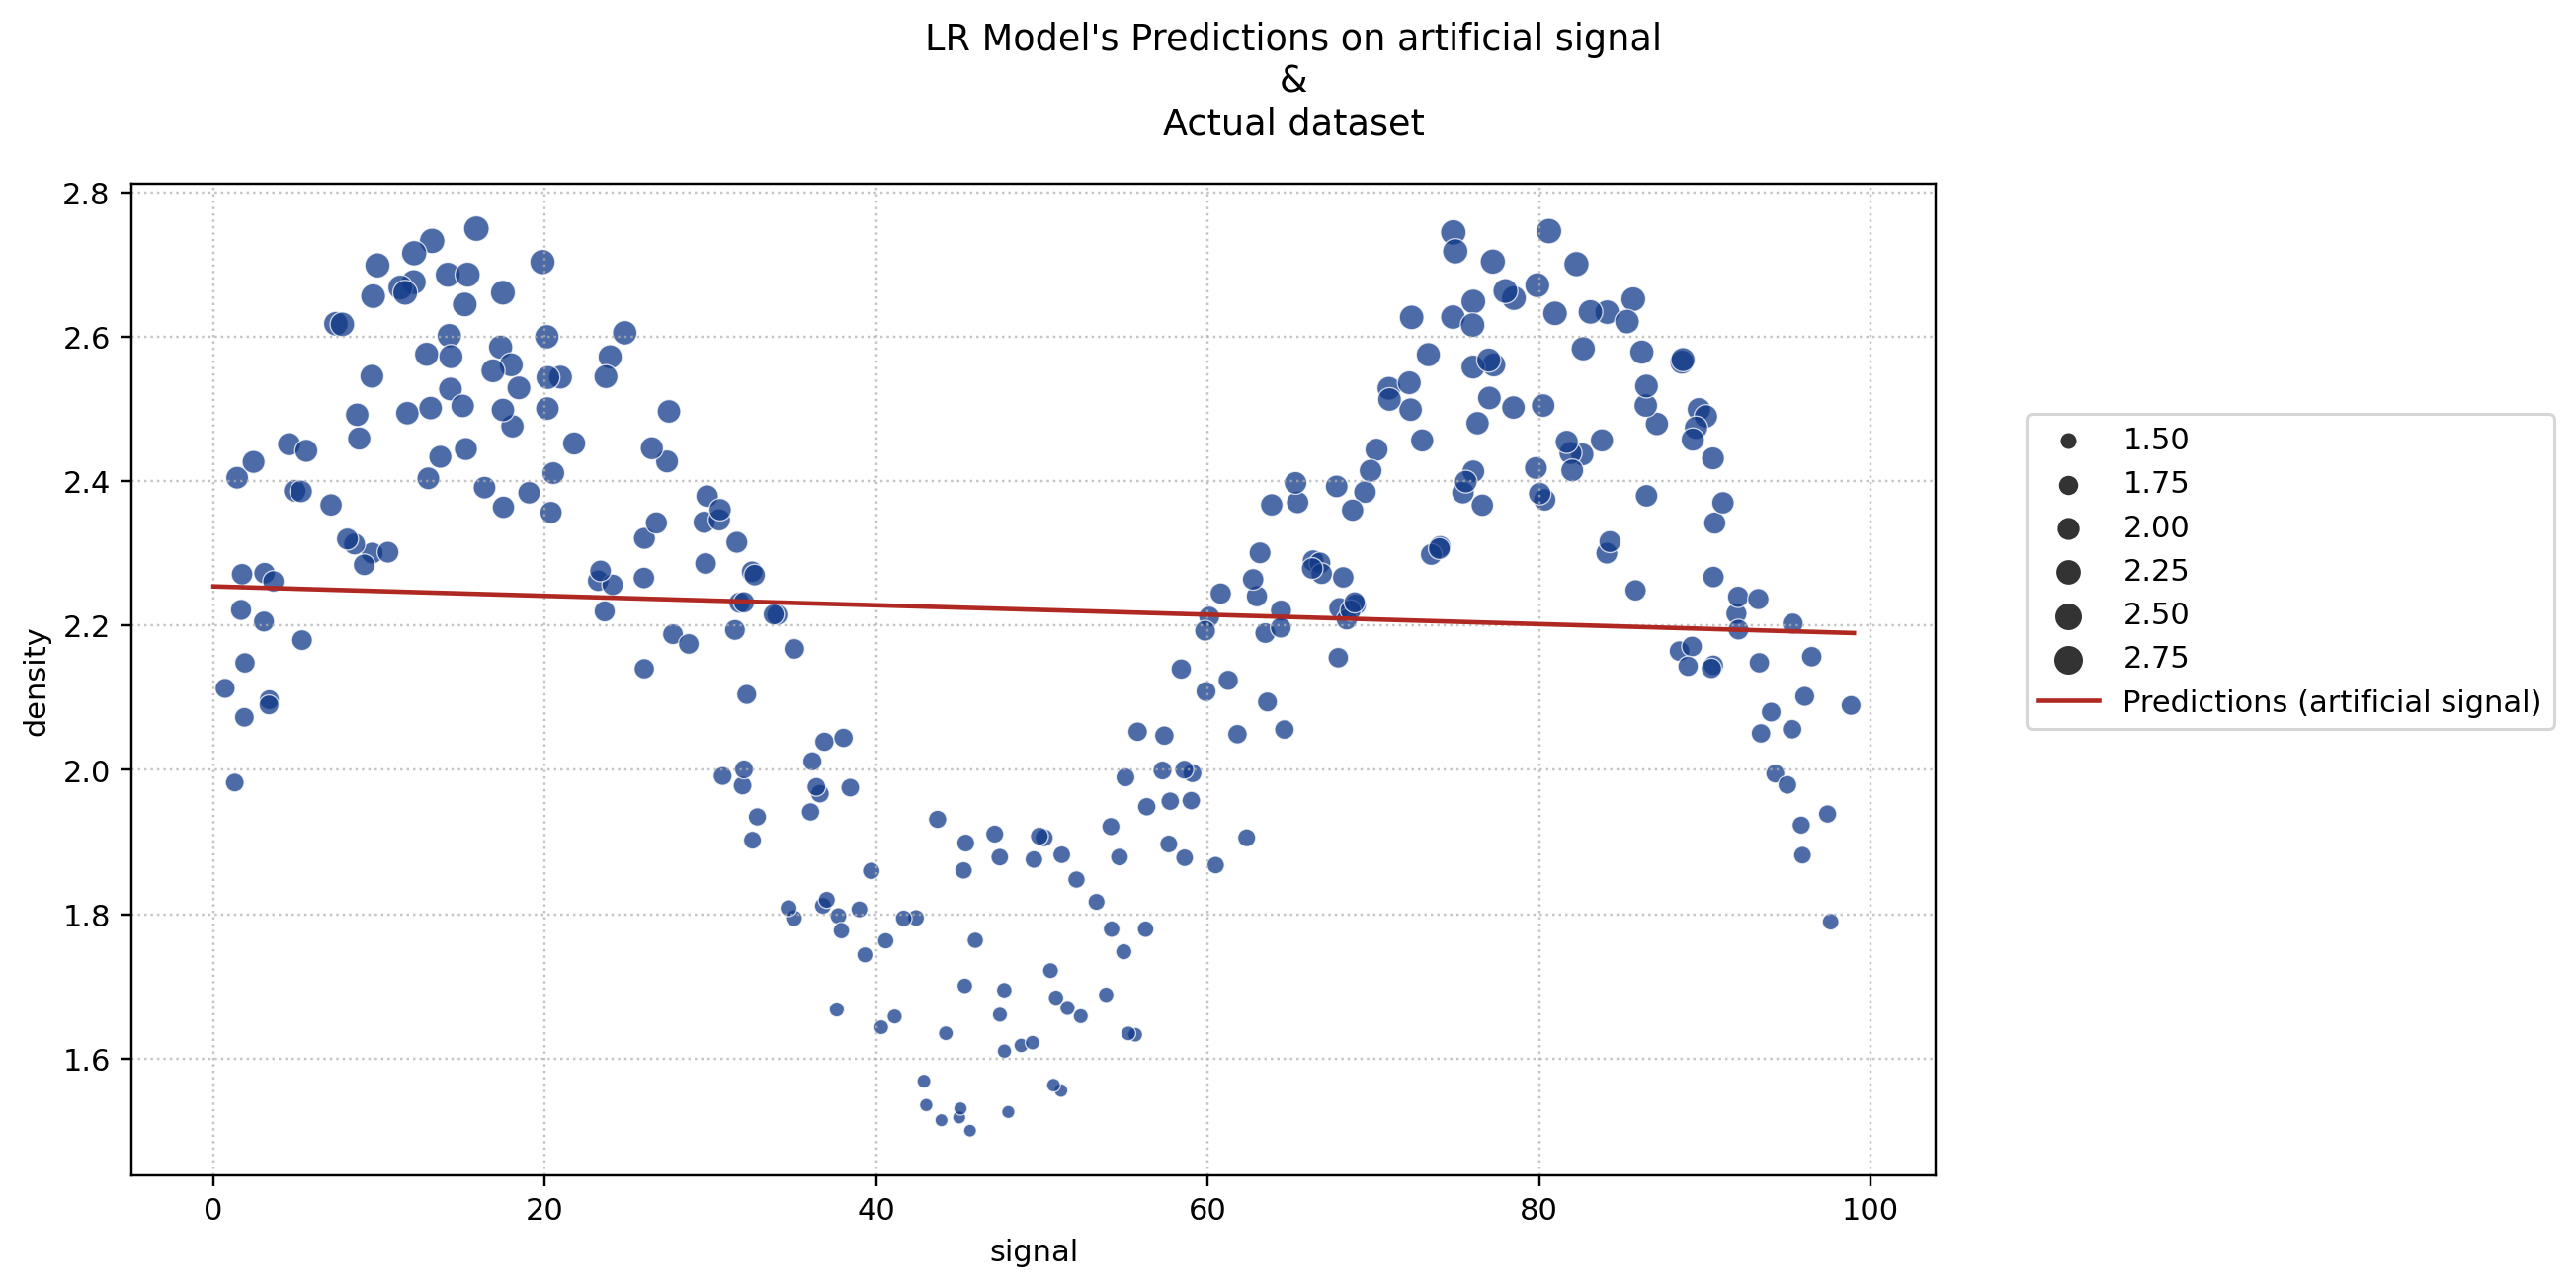

In [21]:
# plot to visualize what might be happening

fig, ax = plt.subplots(figsize=(12,6), dpi=220)

sns.scatterplot(x="signal", y="density", data=df, ax=ax,
               s=15, size="density", color="#113988", alpha=0.75)

ax.plot(signal_range, signal_predictions, color="#AF2821",
       label="Predictions (artificial signal)")


ax.grid(linestyle=":", linewidth=0.8, alpha=0.75)
ax.legend(loc=(1.05, 0.45))

fig.suptitle("LR Model's Predictions on artificial signal\n&\nActual dataset")
fig.tight_layout();

### Observation
1. Visualizing clearly exposes **high bias** of **`Linear Regression Model`** which is leading to **underfitting** the data.
    - as good as predicting same value irrespective of input

Checking **coefficient of determination ($R^2$)** may help further.
>_$R^2$ determines how much of the **variation in datapoints** of the dataset (`signal` v/s `density`) is **explained by the LR model**. i.e. THe **goodness of fit** of the LR model which is learning from the dataset and making predictions_.
>>$$R^2 = 1 - \frac{\Sigma(y_i - p_i)^2}{\Sigma(y_i - \mu)^2}$$, $$y_i = \;Actual\; true\; values\; (Density)$$ $$p_i = \;Predicted\; values$$ $$\mu = \; Mean\;of \; Actual \;true\;values$$
>>$$R^2 = 1 \rightarrow Perfect\;fit$$ $$R^2 = 0 \rightarrow No\;relationship\;between\;Model\;and\;dataset$$

### Coefficient of Determination ($R^2$) to check goodness of fit

In [22]:
def r_squared(y, estimated):
    """
    Calculate the R-squared error term.
    Args:
        y: list with length N, representing the y-coords of N sample points
        estimated: a list of values estimated by the regression model
    Returns:
        a float for the R-squared error term
    """
    
    # convert into numpy arrays for easier computation
    y = np.array(y)         # actual values
    p = np.array(estimated) # predicted values
    
    mean = np.mean(y)
    
    # numerator captures mean error in predictions
    numerator = np.sum((y - p)**2)
    # denominator captures variance in actual values
    denominator = np.sum((y - mean)**2)
    
    # r quared
    return (1 - (numerator/denominator))

In [23]:
lr_r2 = r_squared(y=y_test, estimated=lr_predictions)

print(f"Coefficient of Determination (R^2) for LR Model = {round(lr_r2)}")

Coefficient of Determination (R^2) for LR Model = 0


### Observation
1. Coefficient of Determination ($R^2$) = 0
    - signifies there is **no relationship** between **`LR model`** and the underlying **dataset** $\rightarrow$ Model **fails to explain the data**
    
### Conclusion
>_Though **`MAE`** & **`RMSE`** look good, the above analysis clearly exposes **high bias** of the model_.
>>_**Linear Regression** is **not suitable** for modeling the current problem_.

## Helper function to test models

In [78]:
def runModel(model, X_train, y_train, X_test, y_test):
    """
    Function performs following:
    1. Fits the model to Training set
    2. Makes predictions on Test set
    3. Prints Mean Absolute Error & Root Mean Squared Error
    for the model's predictions along with R^2
    4. Plots the model over an artificial signal range
    from 0 to 99
    """
    
    # fit model
    model.fit(X_train, y_train)
    # predictions
    pred = model.predict(X_test)
    
    # compute mae & rmse
    mae = mean_absolute_error(y_true=y_test, y_pred=pred)
    rmse = (mean_squared_error(y_true=y_test, y_pred=pred))**0.5
    
    # print info.
    print(f"MAE = {round(mae, ndigits=4)}")
    print(f"RMSE = {round(rmse, ndigits=4)}")
    
    
    # artificial signal
    signal = np.arange(0,100).reshape(-1,1)
    # predictions on signal
    pred_signal = model.predict(signal)
    
    # plot
    fig, ax = plt.subplots(figsize=(12,6), dpi=220)
    # actual dataset
    sns.scatterplot(x="signal", y="density", data=df, ax=ax,
                   s=15, size="density", color="#113988", alpha=0.75)
    # artificial signal range v/s predictions
    ax.plot(signal, pred_signal, color="#AF2821",
           label="Predictions (artificial signal)")
    # for clarity of plots
    ax.grid(linestyle=":", linewidth=0.8, alpha=0.75)
    ax.legend(loc=(1.05, 0.45))
    fig.suptitle("LR Model's Predictions on artificial signal\n&\nActual dataset")
    fig.tight_layout();

### Testing Linear Regression Model with the helper function

MAE = 0.2089
RMSE = 0.2666


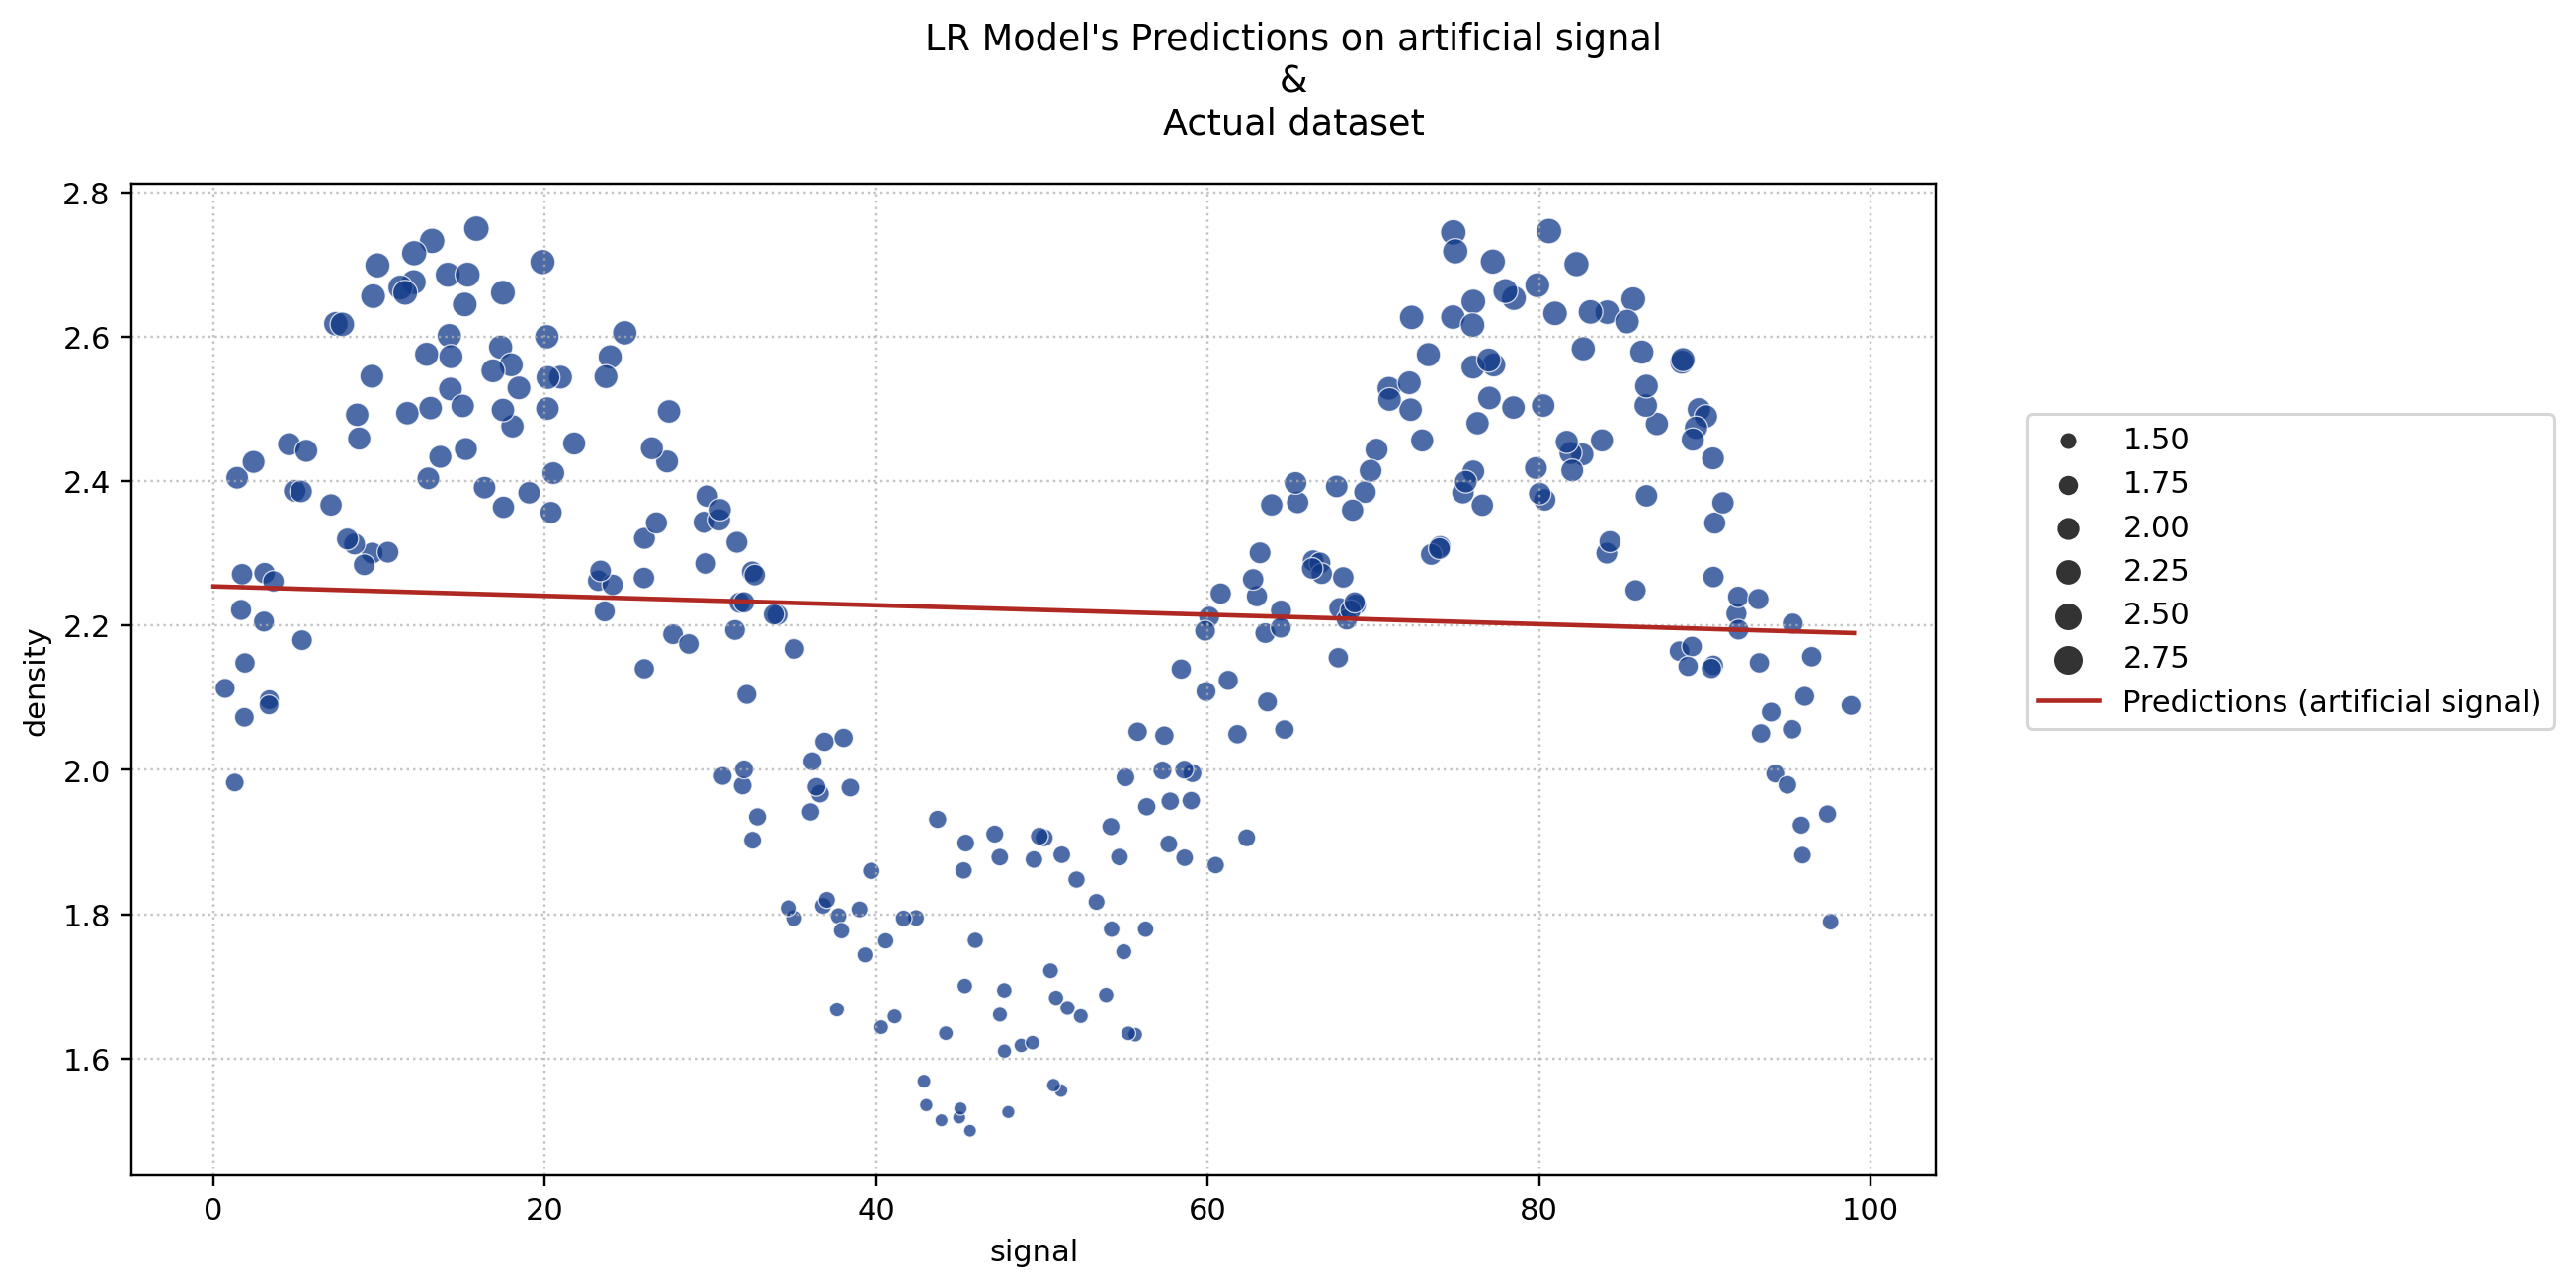

In [79]:
runModel(LinearRegression(), X_train, y_train, X_test, y_test)

# Try 2: Testing Models of various degrees

In [80]:
# for creating pipeline of polynomial degrees to try out

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

### `make_pipeline`
1. Creates a **pipeline of tasks** to perform one by one
    - Create `Polynomial Features with given degree` $\rightarrow$ Create `Linear Regression model`
2. Can **fit** the pipeline model created and make **predictions** like a regular model
    
```python
# create pipeline model
pipeline = make_pipeline(PolynomialFeatures(degree=), LinearRegression())

pipeline.fit(X_train, y_train) # fit the polynomial regression model
pipeline.predict(X_test) # make predictions with the model
```

### `Degree = 2`

In [81]:
# pipeline of tasks

# create Polynomial Regression Model of degree 2
pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

MAE = 0.2437
RMSE = 0.2815


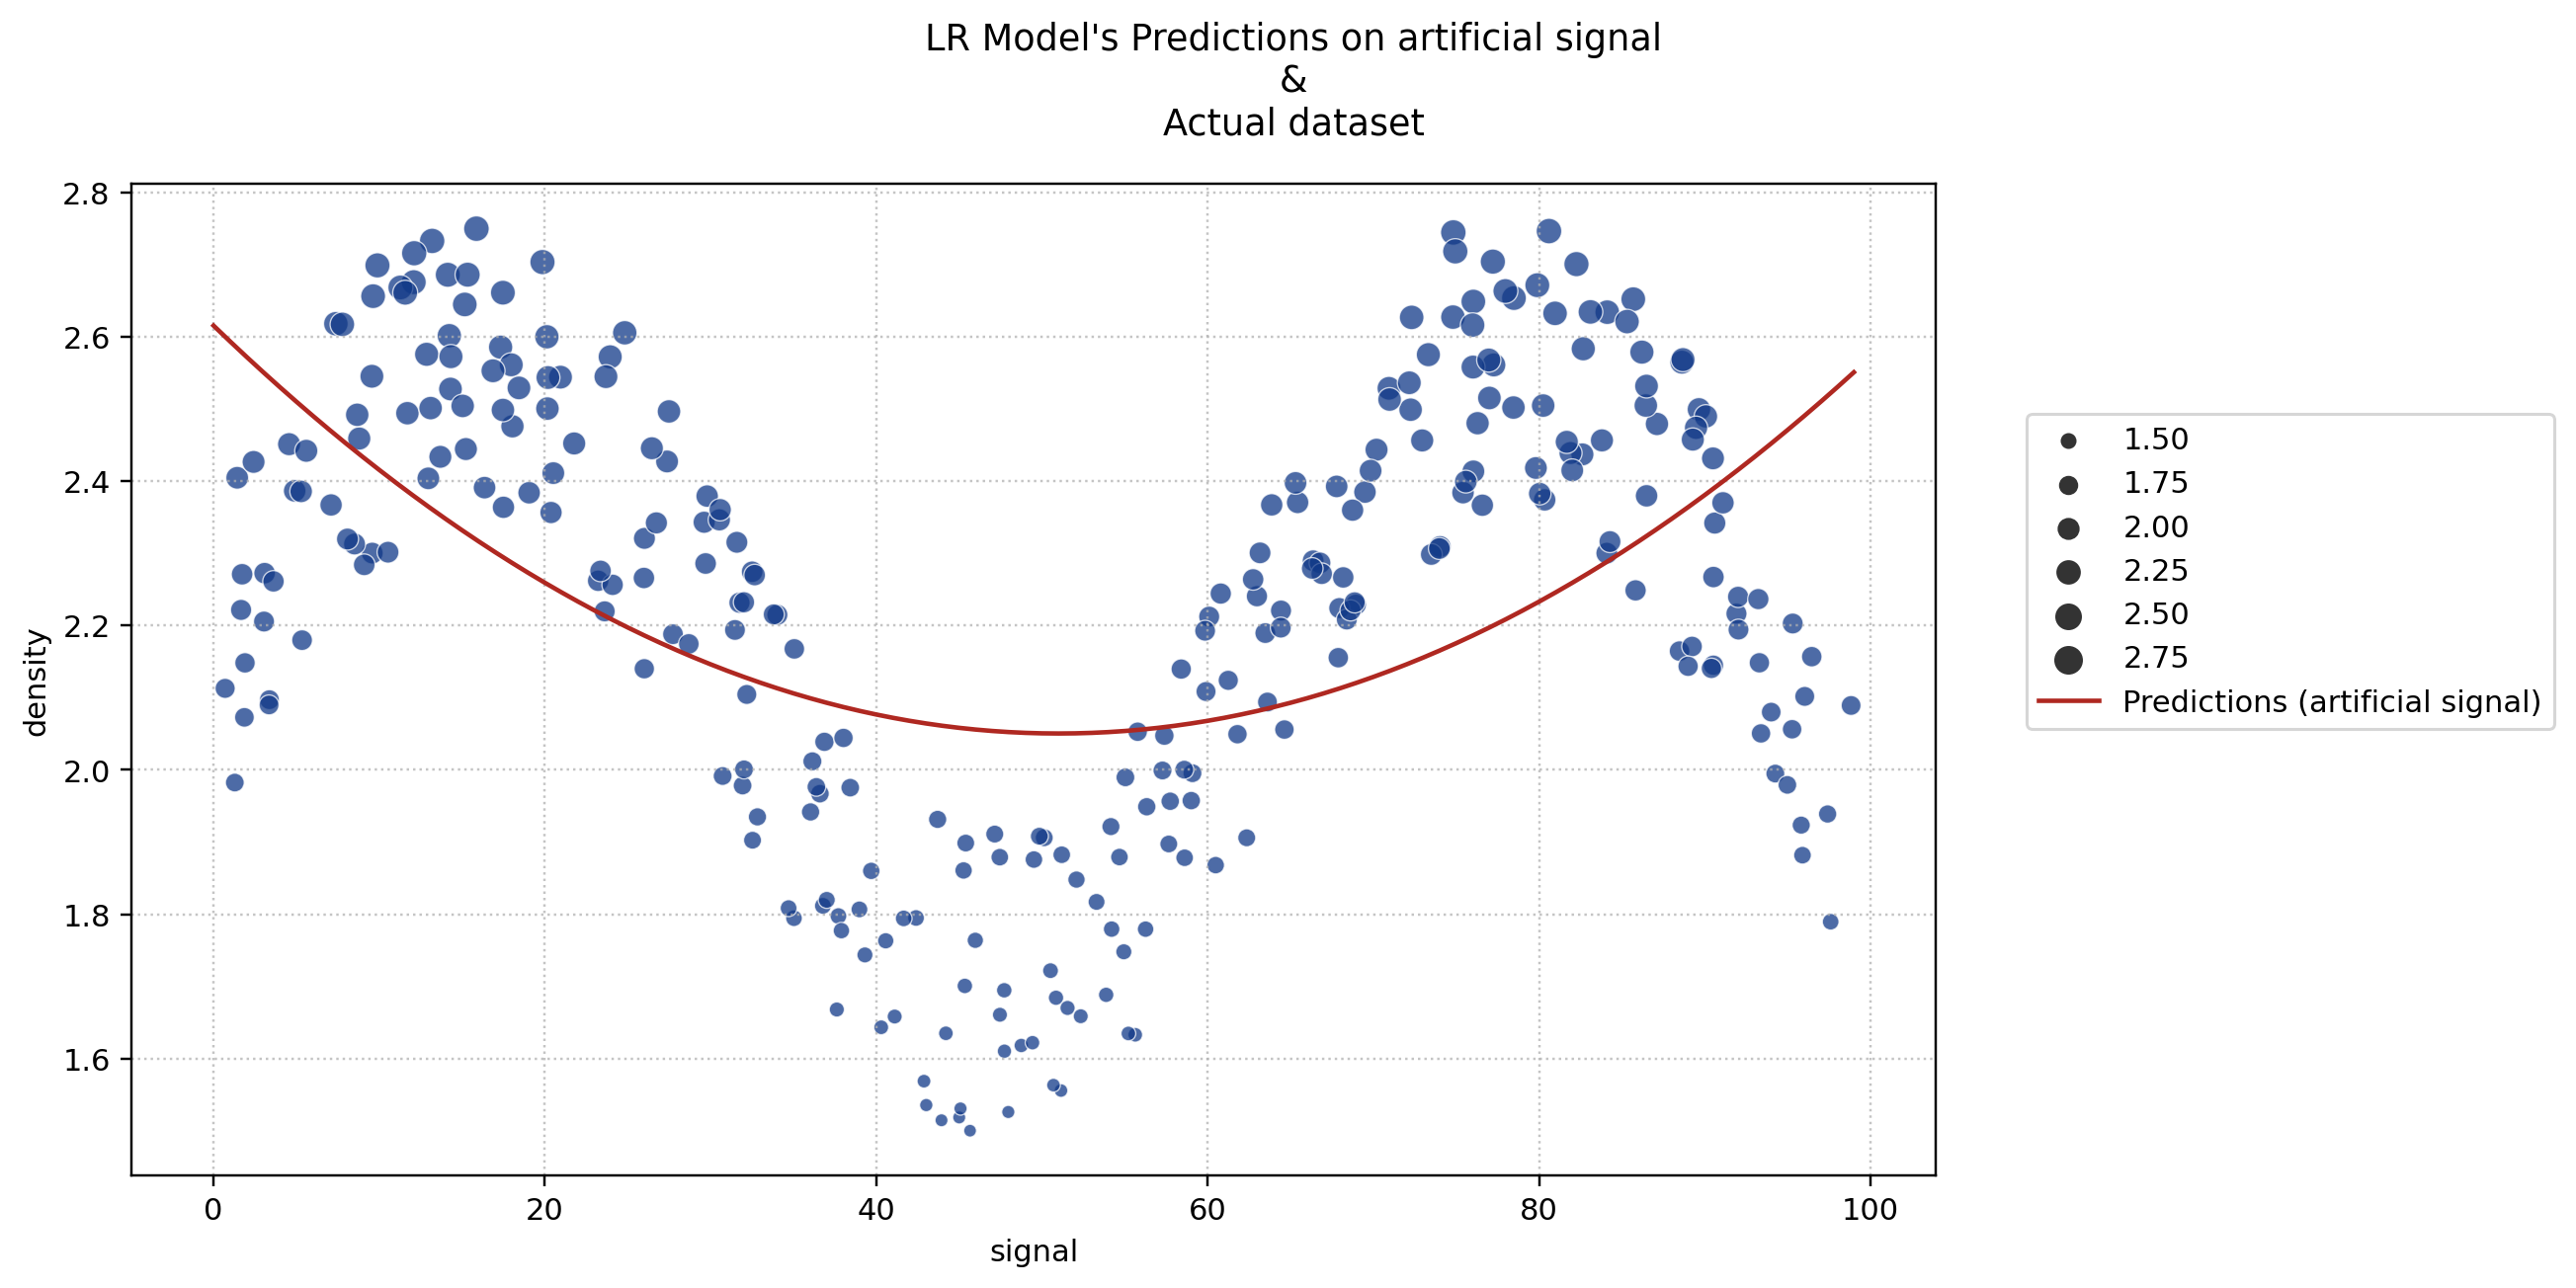

In [82]:
# run pipeline

runModel(pipeline, X_train, y_train, X_test, y_test)

### `Degree = 6`

MAE = 0.1043
RMSE = 0.1233


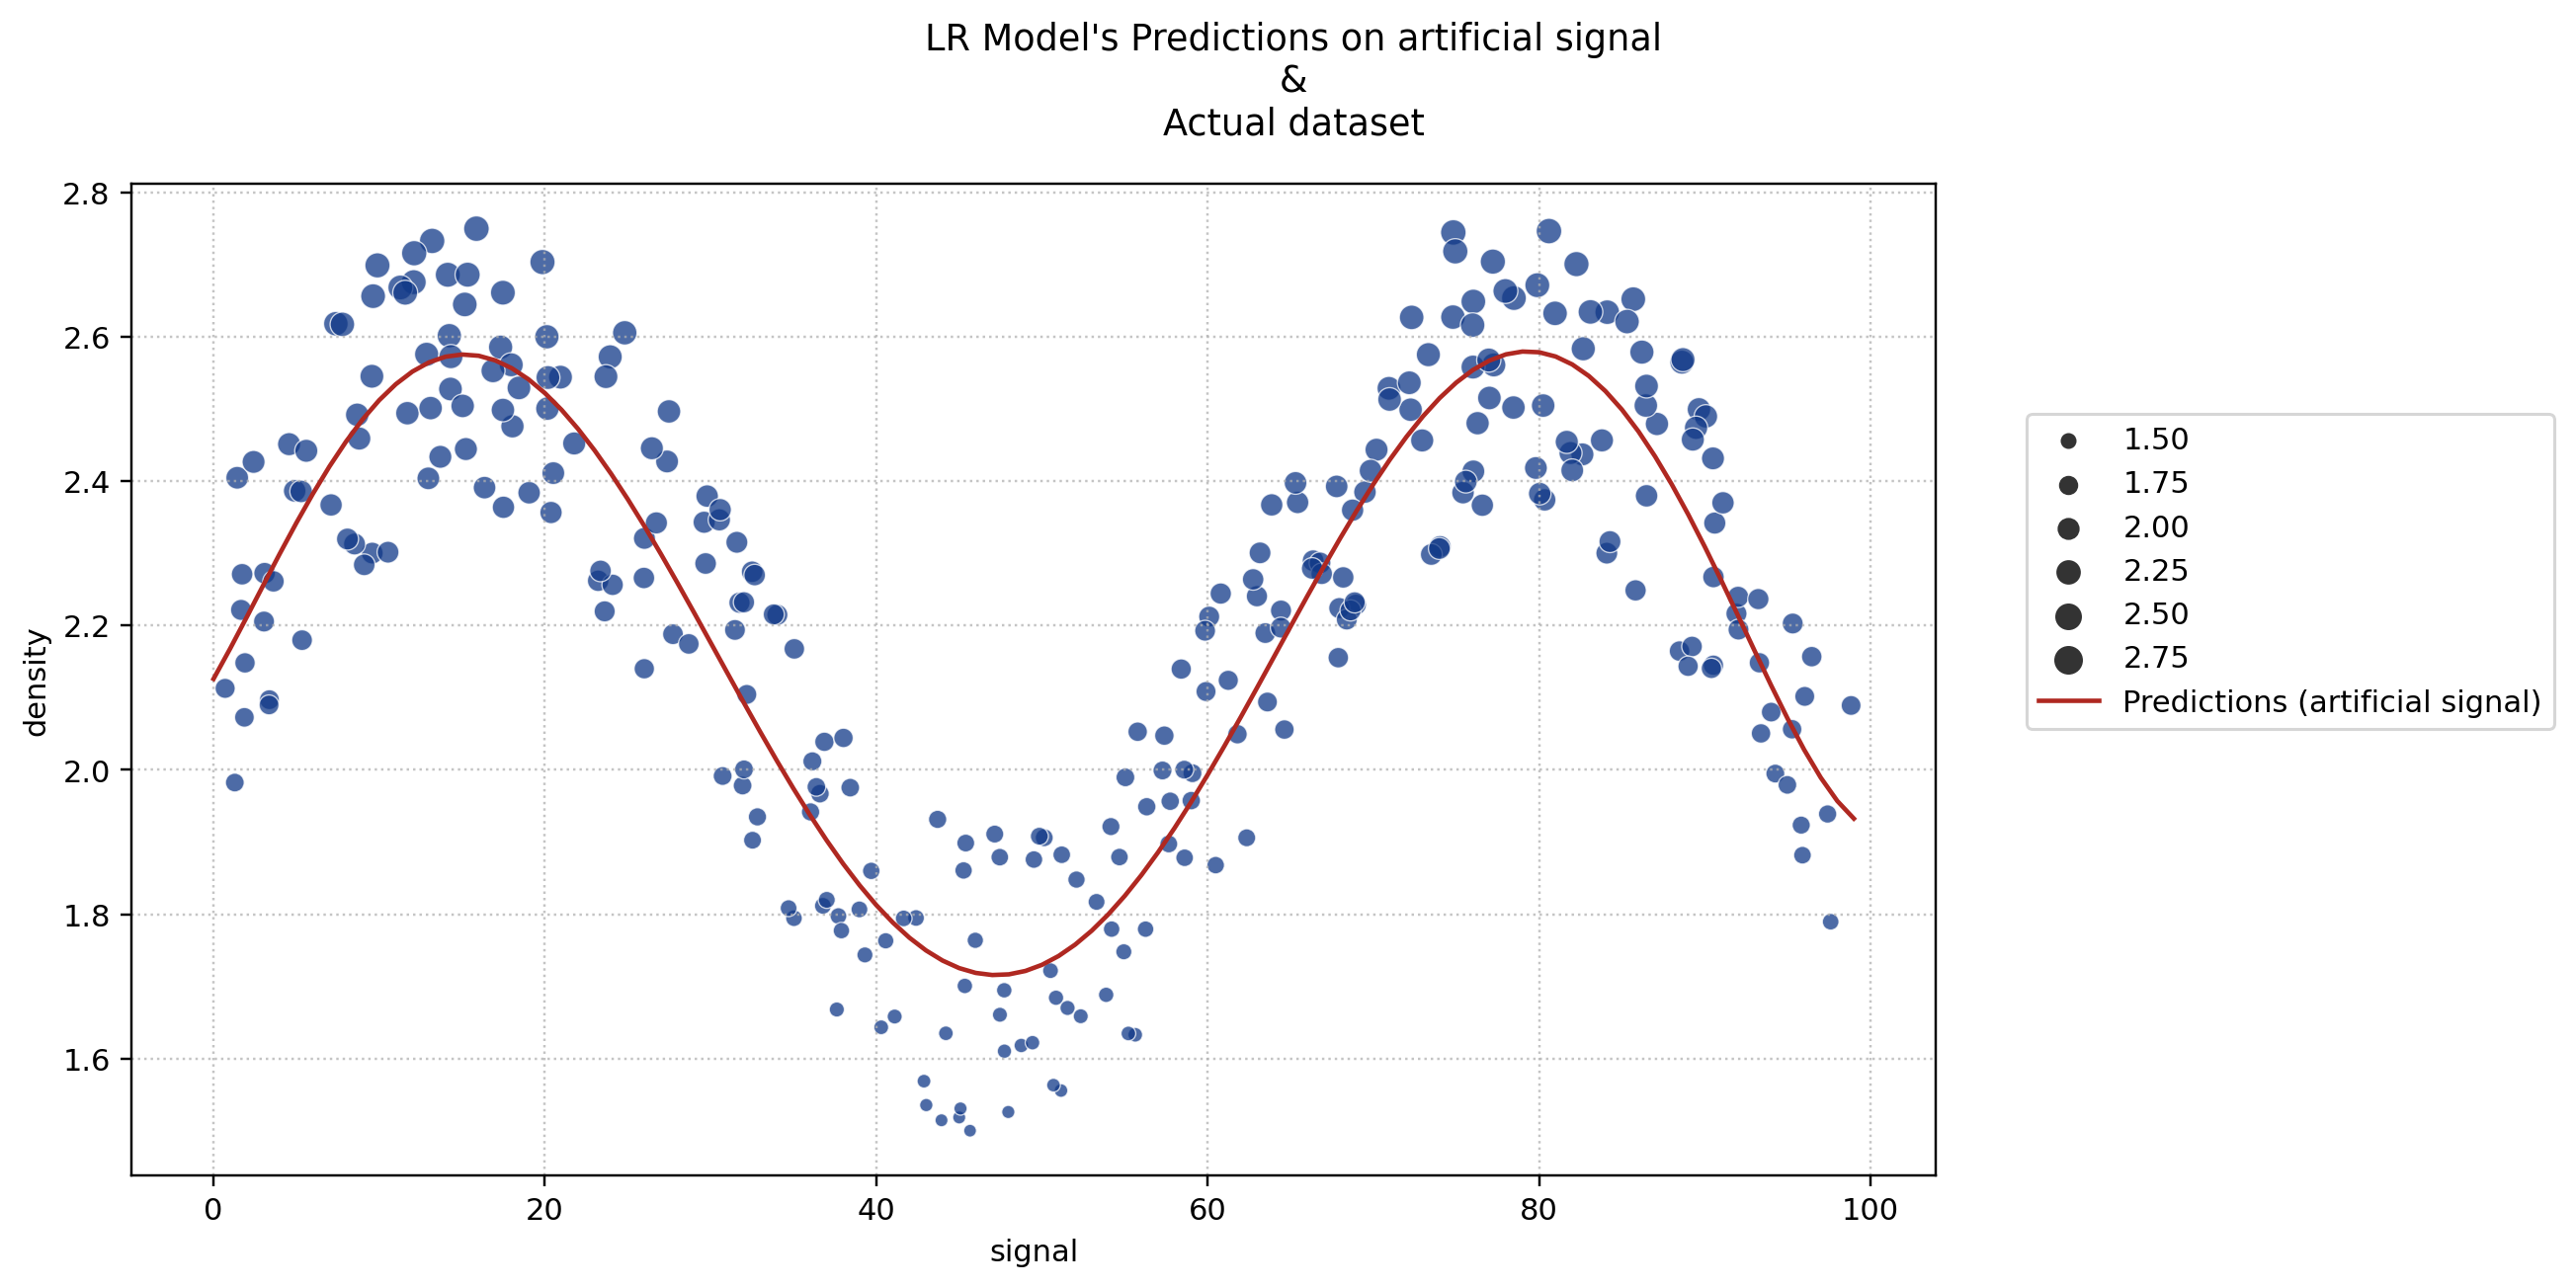

In [83]:
# create Polynomial Regression Model of degree 6
pipeline6 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

runModel(pipeline6, X_train, y_train, X_test, y_test)

### `Degree = 16`

MAE = 0.1455
RMSE = 0.1784


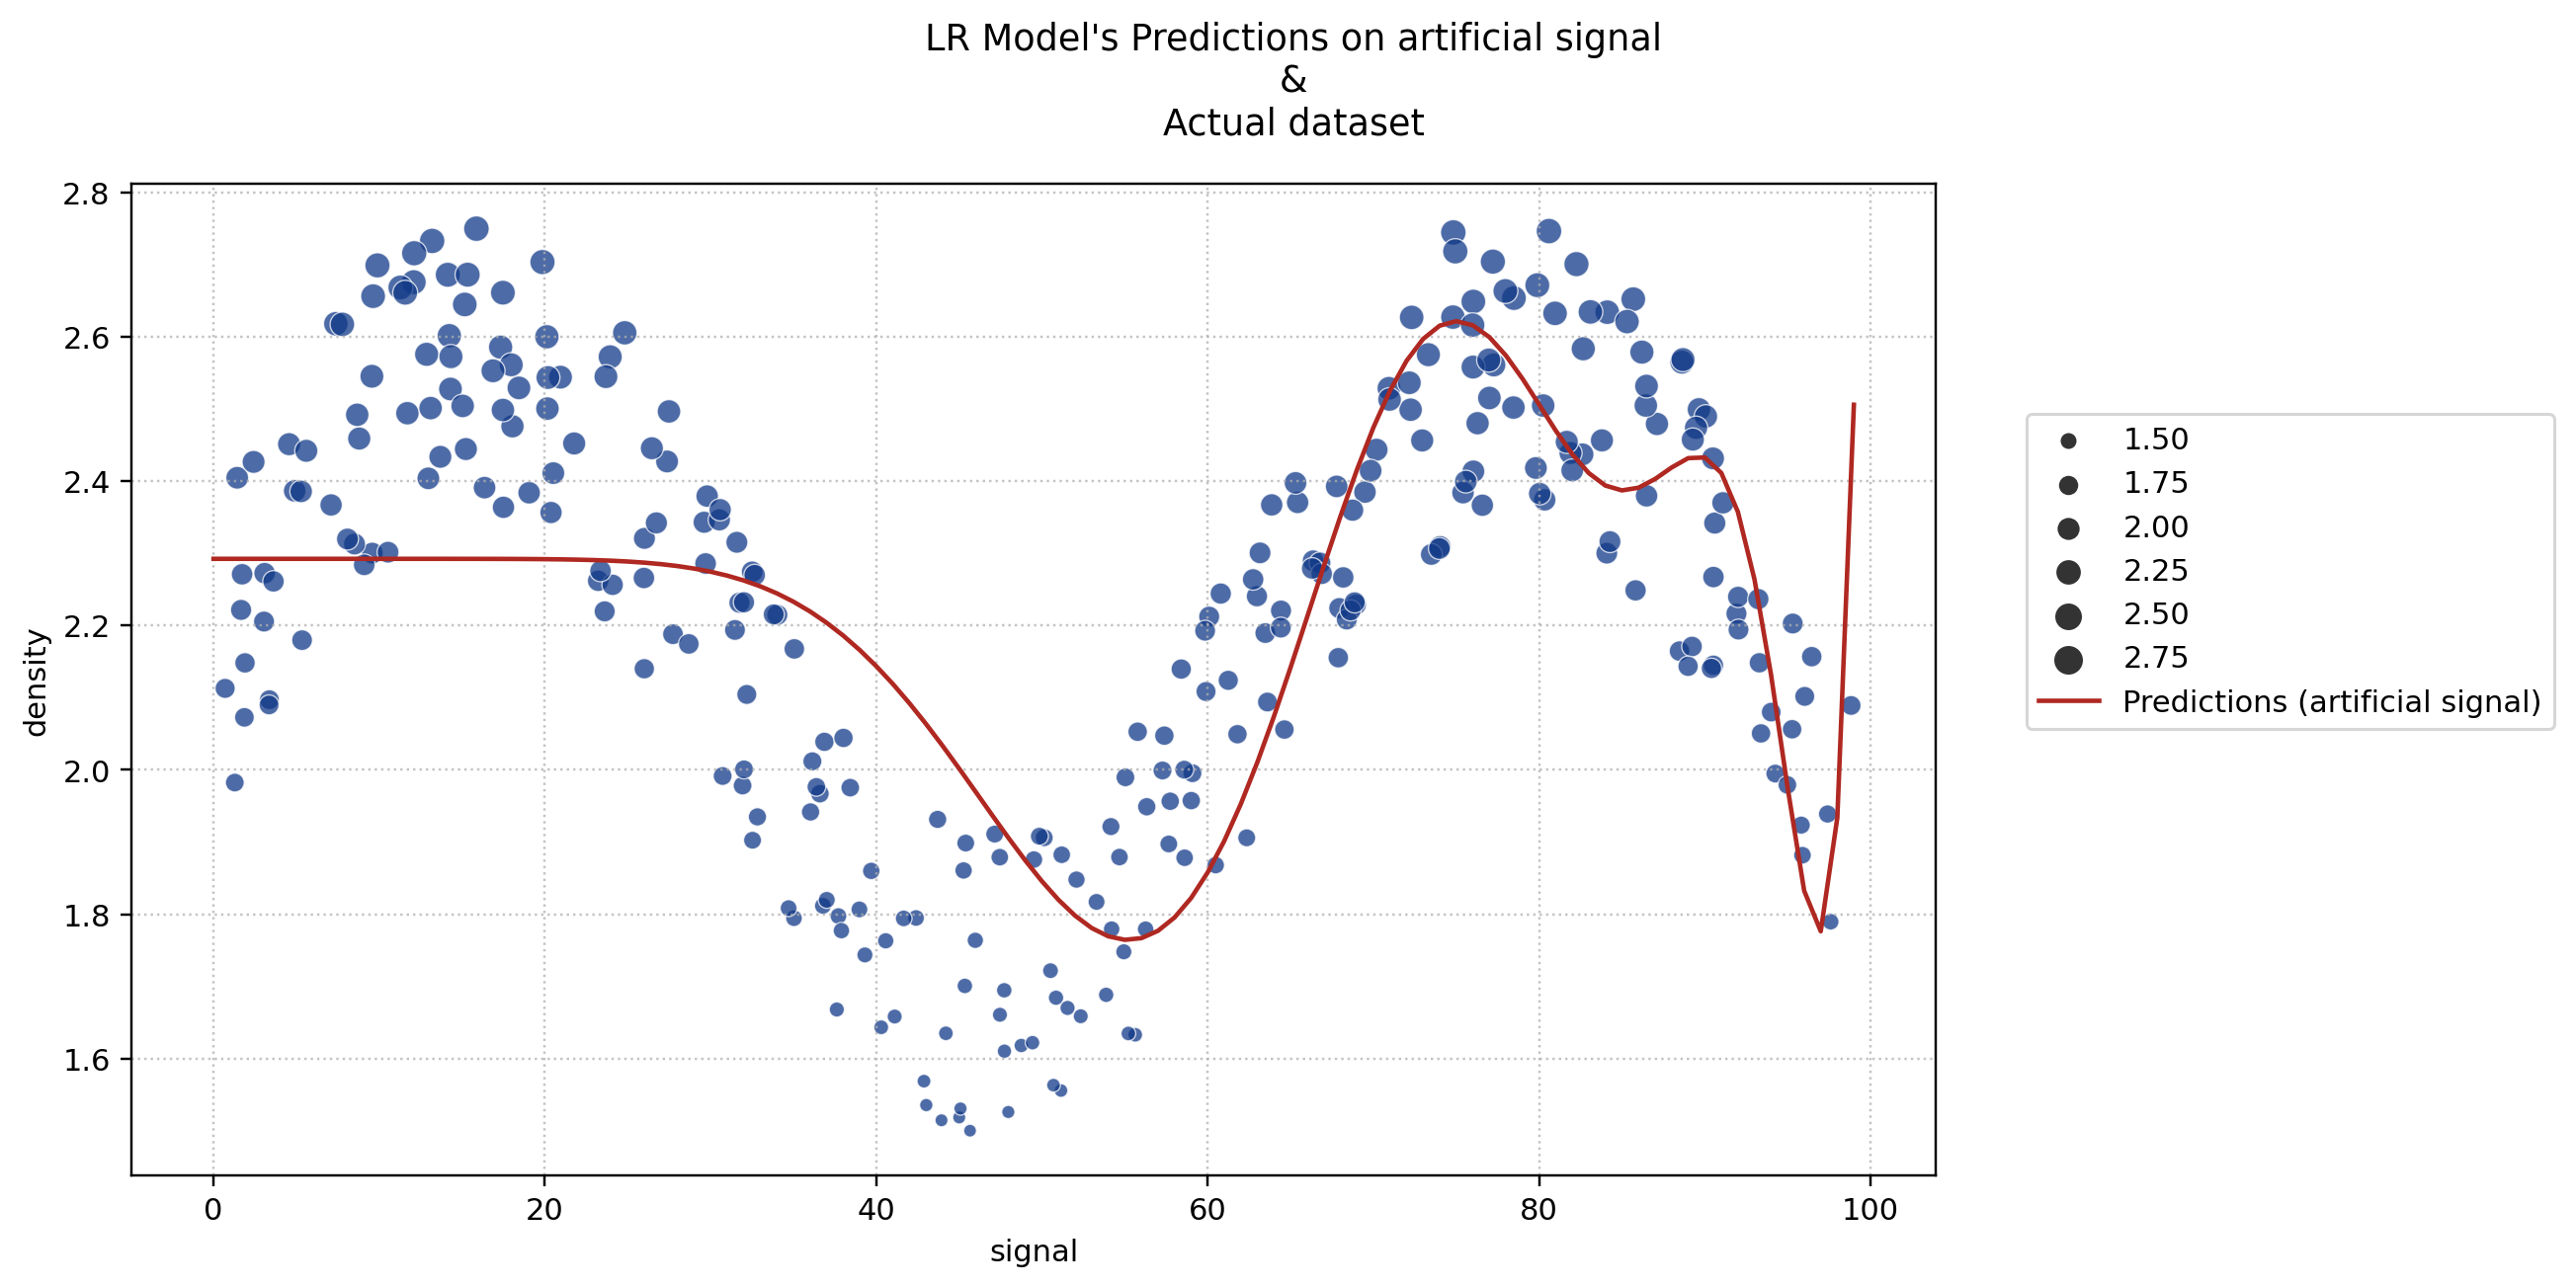

In [84]:
# create Polynomial Regression Model of degree 16
pipeline16 = make_pipeline(PolynomialFeatures(degree=16), LinearRegression())

runModel(pipeline16, X_train, y_train, X_test, y_test)

### Observation
1. Above plots showing **`degree=2` v/s `degree=6` v/s `degree=16`** fit shows that though **`degree=6` is the best fit**, it is still **not appropriate**.
2. Further, there is **risk of high variance** as degree is increased though bias is reduced (_**Bias-Variance trade-off**_).

## Testing Multiple Degrees and Plotting

In [67]:
def runPolyModel(degrees, X_train, y_train, X_test, y_test, printInfo=False):
    """
    Function performs following:
    1. Fits the model to Training set
    2. Makes predictions on Test set
    3. Prints Mean Absolute Error & Root Mean Squared Error
    for the model's predictions along with R^2
    4. Plots the model over an artificial signal range
    from 0 to 99
    """
    # artificial signal
    signal = np.arange(0,100).reshape(-1,1)
    
    # plot
    fig, ax = plt.subplots(figsize=(18,10), dpi=220)
    # actual dataset
    sns.scatterplot(x="signal", y="density", data=df, ax=ax,
                   s=15, size="density", color="#113988", alpha=0.75,
                   label="Actual Dataset")
    
    
    for d in degrees:
        model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    
        # fit model
        model.fit(X_train, y_train)
        # predictions
        pred = model.predict(X_test)
    
        # compute mae & rmse
        mae = mean_absolute_error(y_true=y_test, y_pred=pred)
        rmse = (mean_squared_error(y_true=y_test, y_pred=pred))**0.5
        r2 = r_squared(y=y_test, estimated=pred)
        
        if printInfo:
            # print info.
            print(f"Model Degree = {d}")
            print(f"MAE = {round(mae, ndigits=4)}")
            print(f"RMSE = {round(rmse, ndigits=4)}")
            print(f"R^2 = {round(r2, ndigits=4)}\n")
    

        # predictions on signal
        pred_signal = model.predict(signal)
    
        
    
        # artificial signal range v/s predictions
        ax.plot(signal, pred_signal,
               label=f"Predictions (artificial signal)\nDegree {d}")
    
        
    # for clarity of plots
    ax.grid(linestyle=":", linewidth=0.8, alpha=0.75)
    ax.legend(loc=(1.05, 0.45))
    fig.suptitle("LR Models of various Degrees")
    fig.tight_layout();

In [68]:
# degrees
degrees = [1, 2, 3, 6, 9, 12, 16]

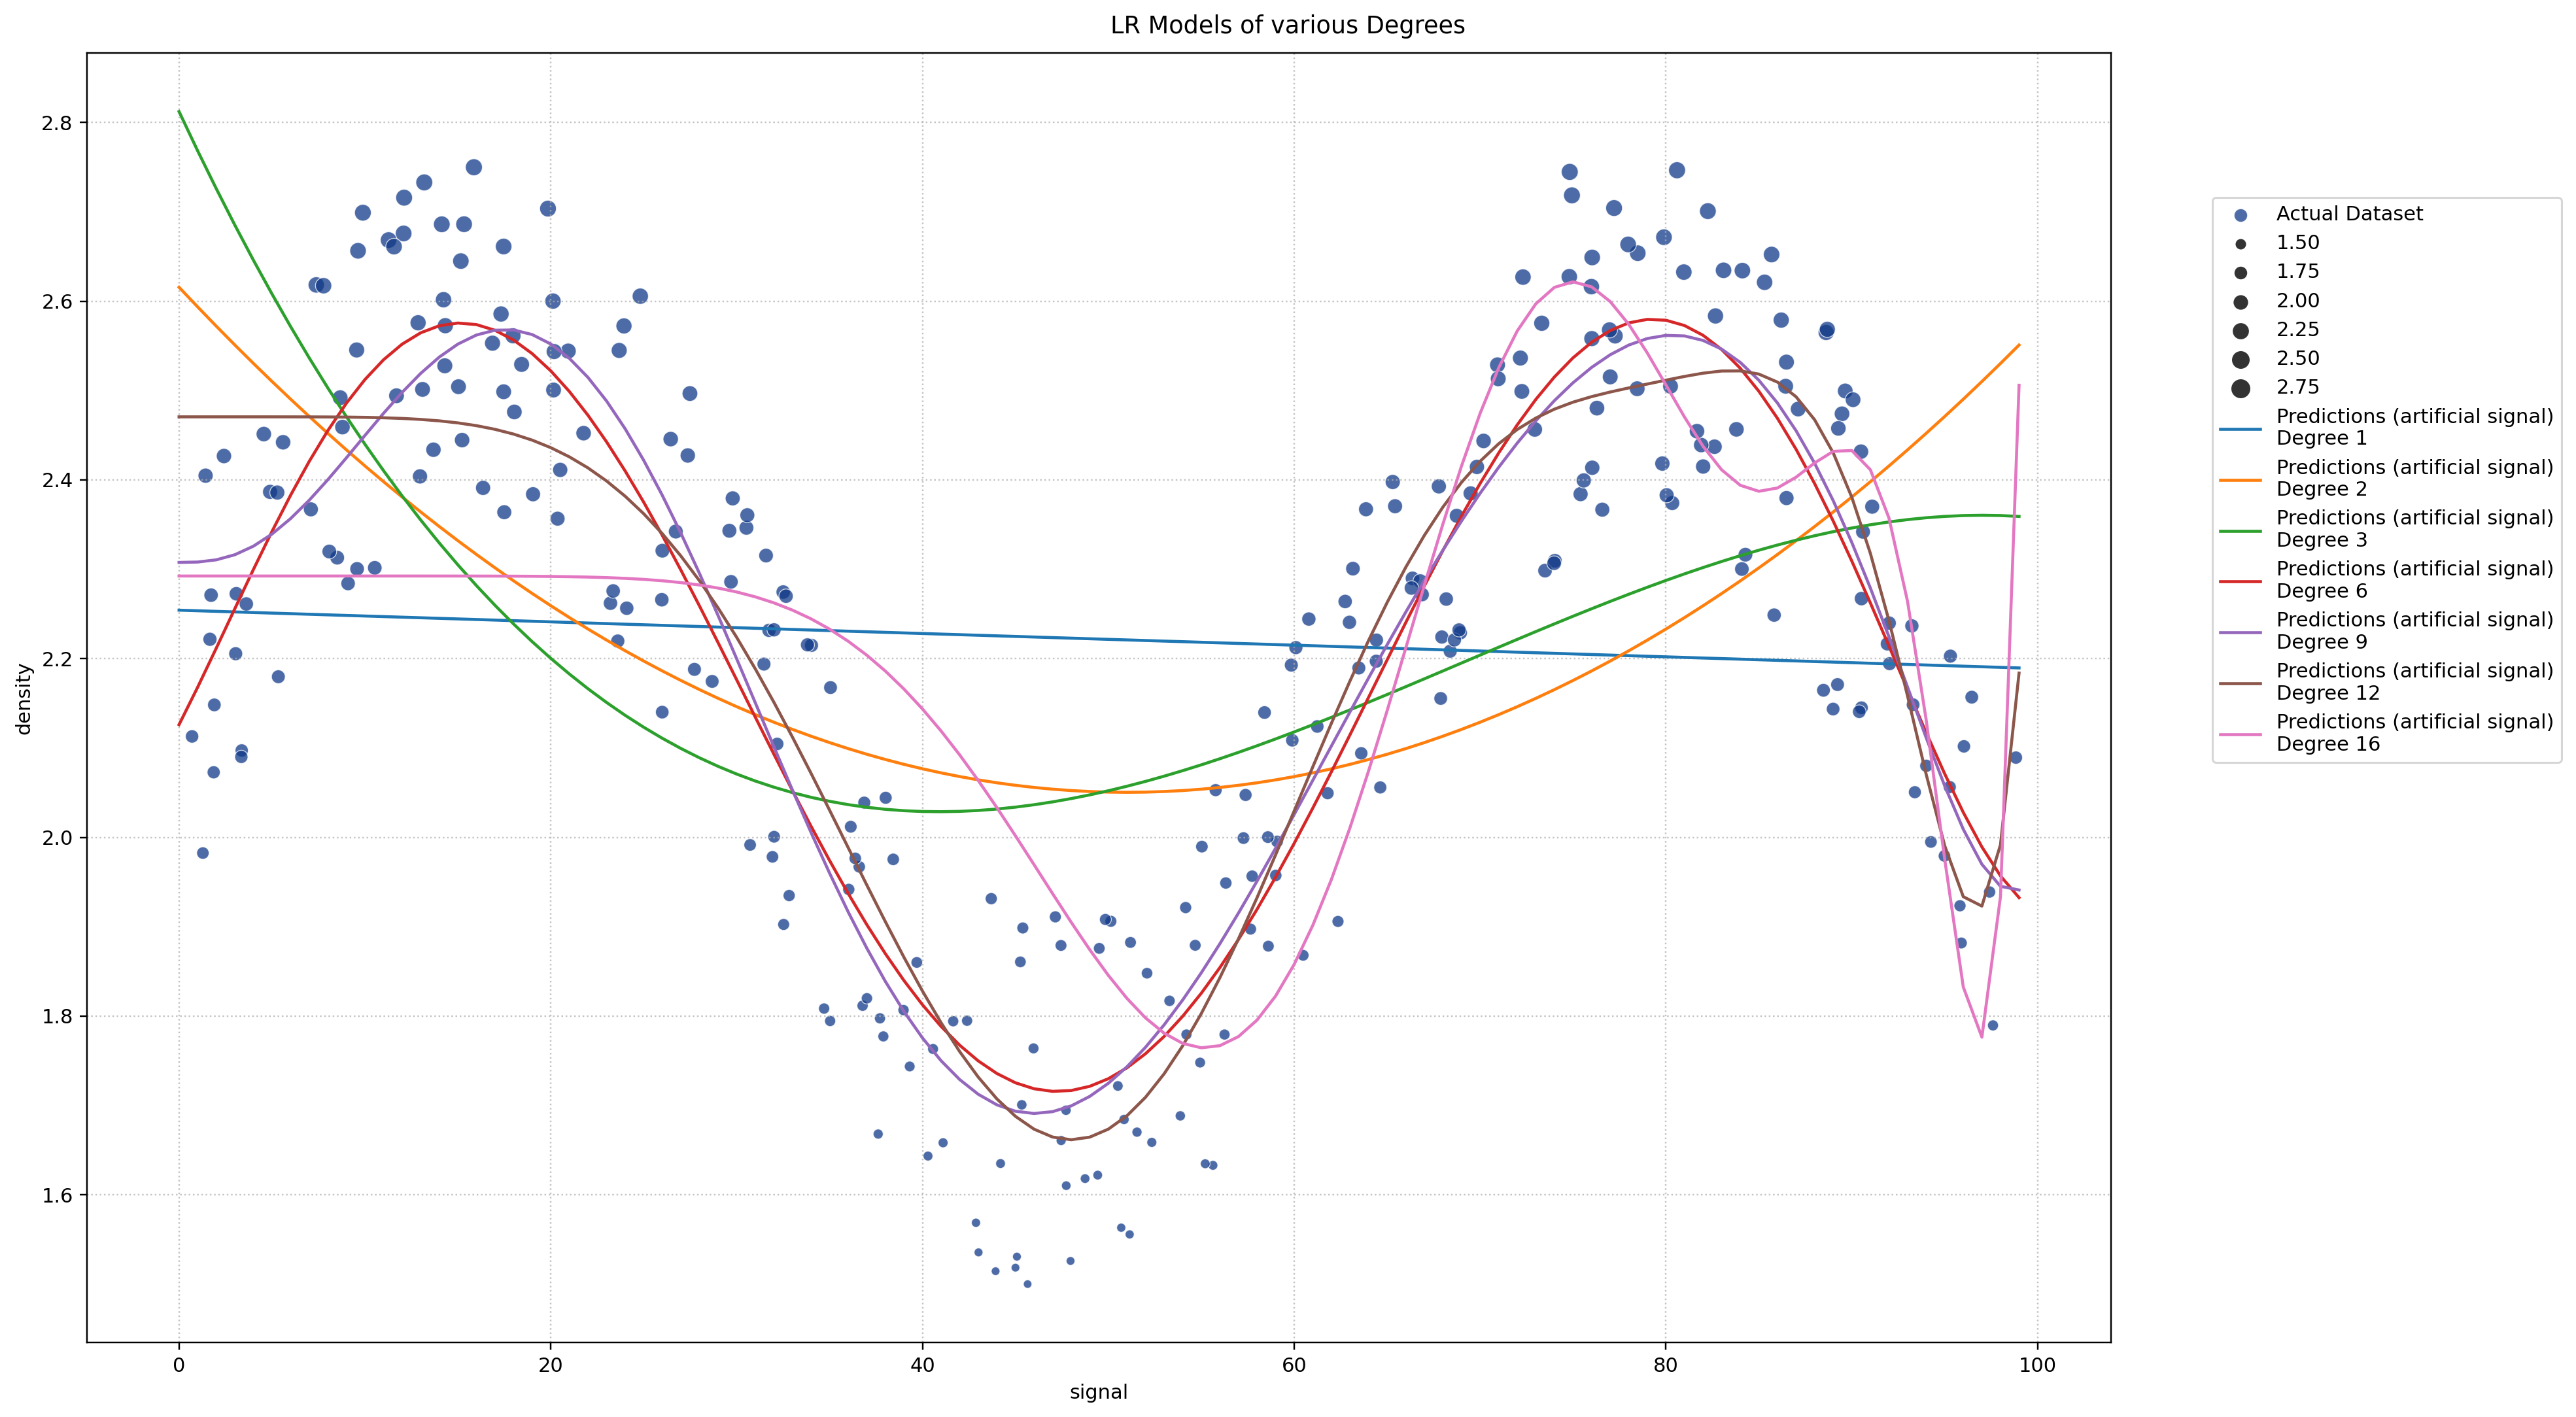

In [69]:
runPolyModel(degrees, X_train, y_train, X_test, y_test, printInfo=False)

# Random Forest Regressor Model

In [71]:
# import regressor

from sklearn.ensemble import RandomForestRegressor

In [74]:
# since only 1 feature present, no. of trees in forest won't be a huge factor
rf_reg = RandomForestRegressor(n_estimators=10)

C:\Users\rayjo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE = 0.1243
RMSE = 0.1501


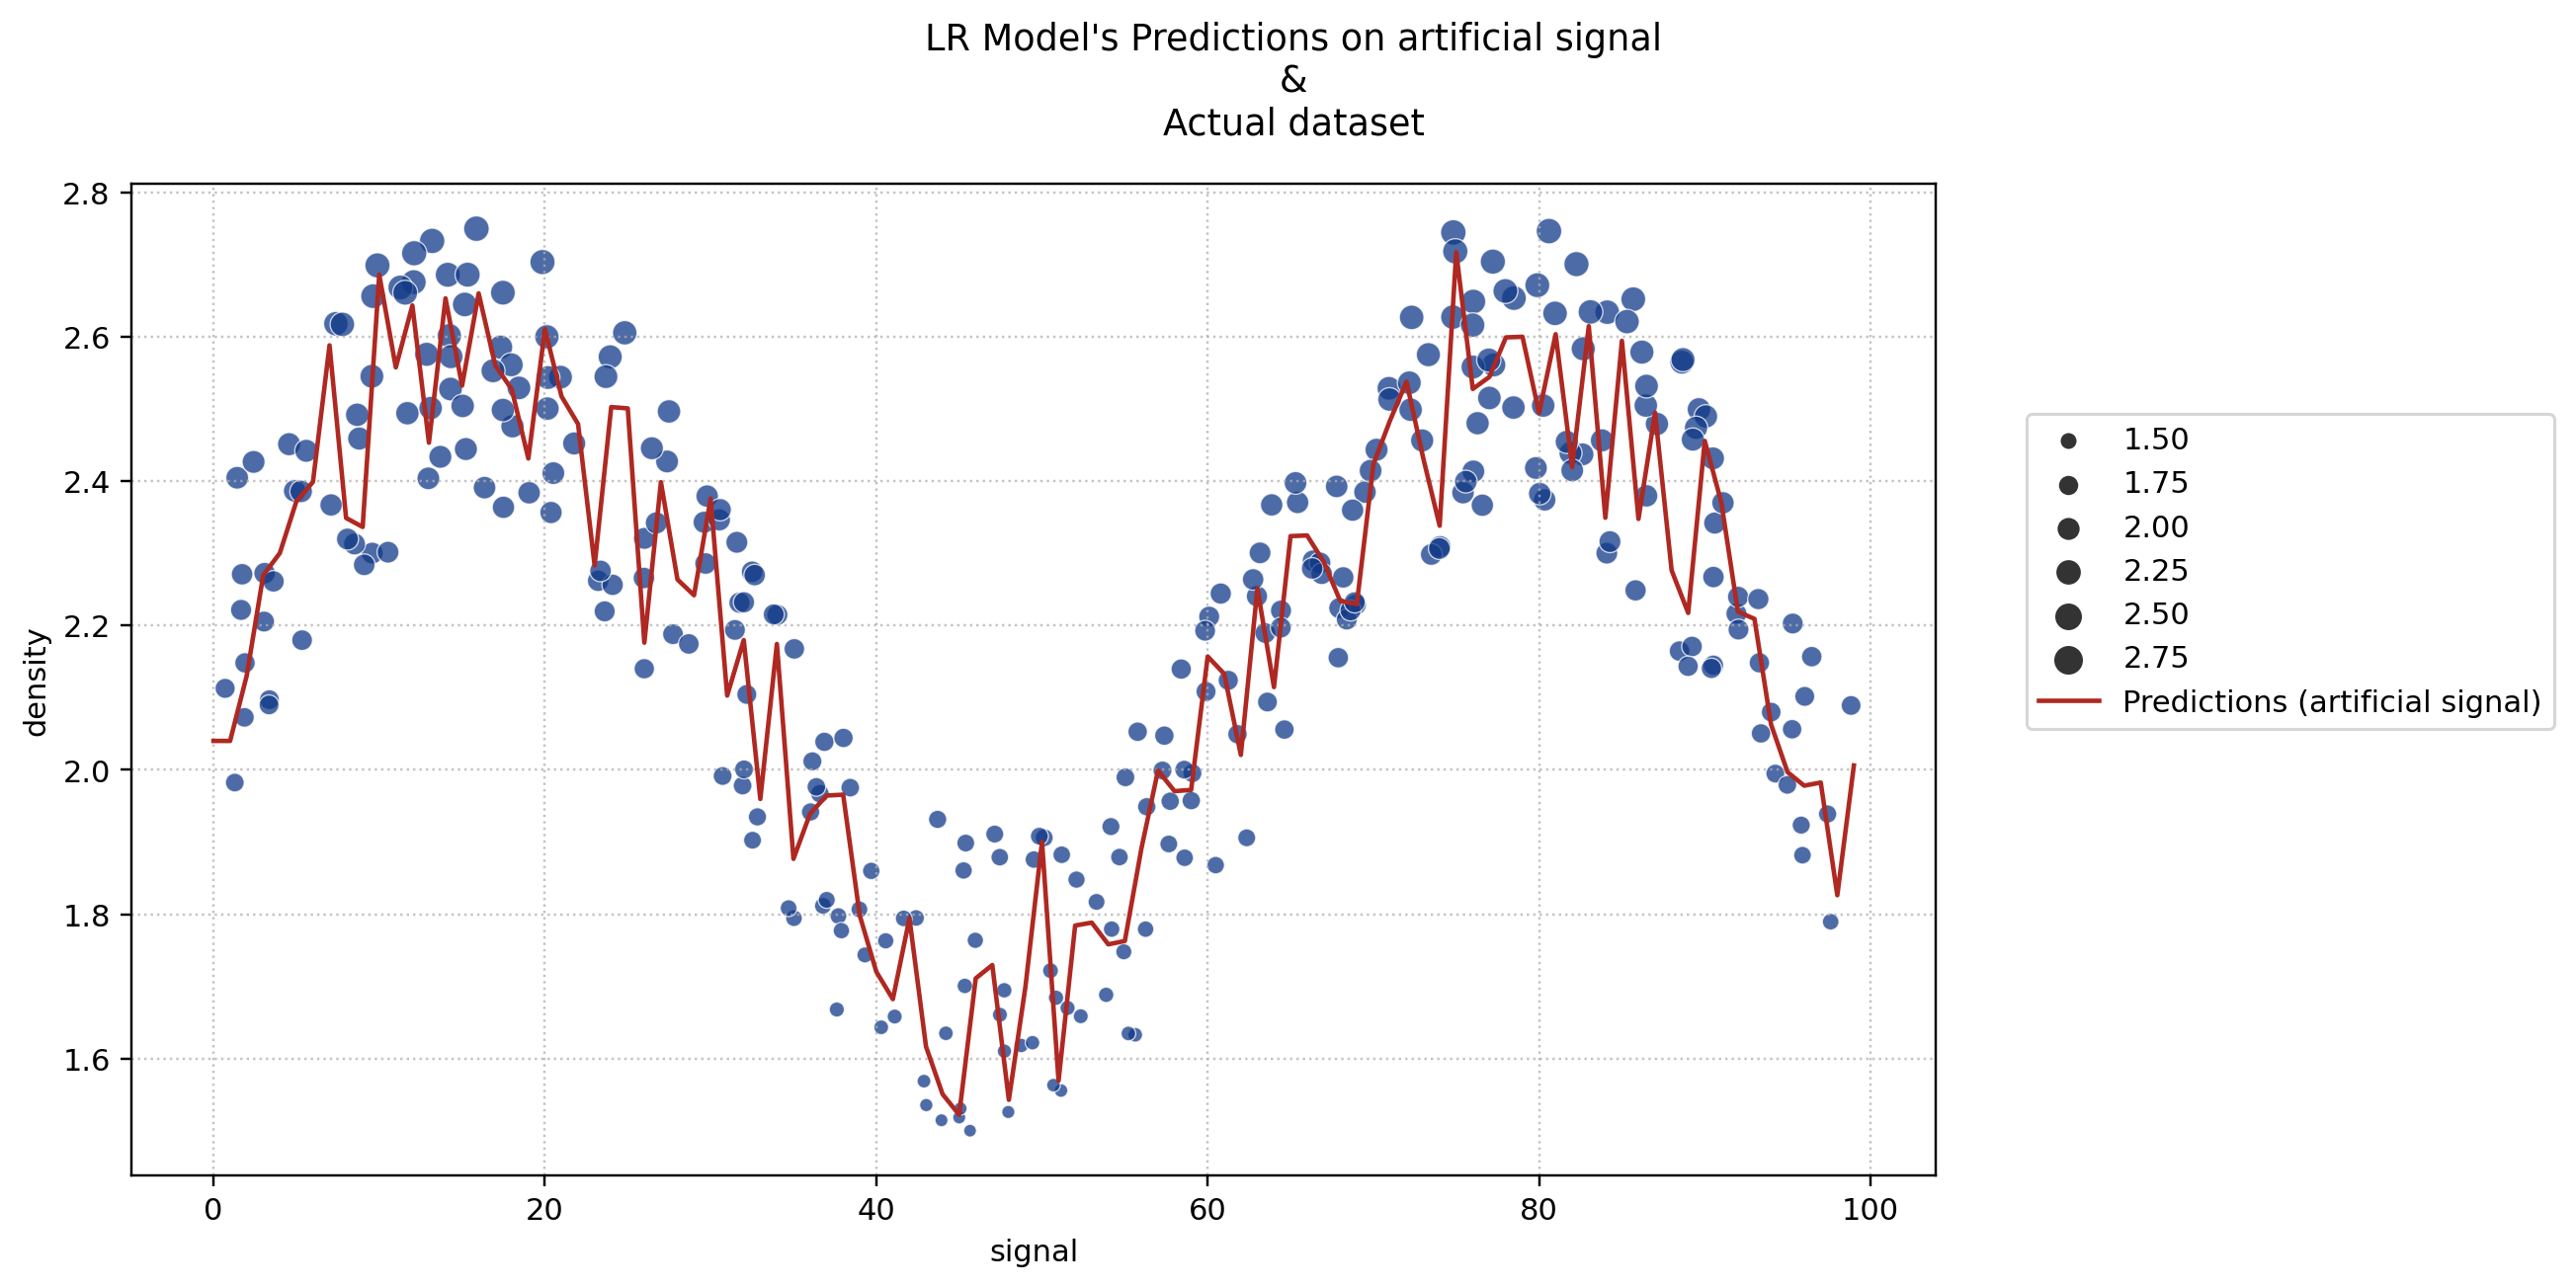

In [85]:
# test random forest regressor model

runModel(rf_reg, X_train, y_train, X_test, y_test)

### Observation
1. **Random Forest Regressor** model works quite well and may **generalize well** into real-world applications.